<a href="https://colab.research.google.com/github/vivekgautamgv/Python-For-Finance/blob/main/Day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock_list = [3.5,5,2,8,4.2]

In [3]:
returns = np.array(stock_list)
print(returns,type(returns))

[3.5 5.  2.  8.  4.2] <class 'numpy.ndarray'>


In [4]:
A = np.array([[1,2],[3,4]])
print(A,type(A))

[[1 2]
 [3 4]] <class 'numpy.ndarray'>


In [5]:
print(A.shape)

(2, 2)


In [6]:
print(returns[1:3])

[5. 2.]


Functions built into NumPy can be easily called on arrays. Most functions are applied to an array element-wise (as scalar multiplication is). For example, if we call log() on an array, the logarithm will be taken of each element.

In [7]:
print(np.log(returns))

[1.25276297 1.60943791 0.69314718 2.07944154 1.43508453]


Some functions return a single value. This is because they treat the array as a collection (similar to a list), performing the designated function. For example, the mean() function will do exactly what you expect, calculating the mean of an array.

In [8]:
print(np.mean(returns))

4.54



Or the max() function will return the maximum element of an array.

In [9]:
np.max(returns)

8.0

# Return to the returns

Now let's modify our returns array with scalar values. If we add a scalar value to an array it will be added to every element of the array. If we multiply an array by a scalar value it will be multiplied against every element of the array. If we do both, both will happen!

In [10]:
returns*2 + 5

array([12. , 15. ,  9. , 21. , 13.4])


NumPy also has functions specifically built to operate on arrays. Let's take the mean and standard deviation of this group of returns.

In [14]:
print("Mean:", np.mean(returns), "Std Dev:", np.std(returns))

Mean: 4.54 Std Dev: 1.9915822855207364


the assets and returns that we will use to build a portfolio. This is because arrays are created with a fixed size. Their dimensions can't be changed without creating a new array.

In [15]:
N = 10
assets = np.zeros((N,100))
returns = np.zeros((N,100))

This function, zeroes(), creates a NumPy array with the given dimensions that is entirely filled in with
. We can pass a single value or a tuple of as many dimensions as we like. Passing in the tuple (N, 100), will return a two-dimensional array with
 rows and
 columns. Our result is a
 array.

Now we will simulate a base asset. We want the universe of stocks to be correlated with each other so we will use this initial value to generate the others.

In [17]:
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)

The random module in NumPy is exceedingly useful. It contains methods for sampling from many different probability distributions, In this case we draw N = 100
 random samples from a normal distribution with mean 1.01 and standard deviation 0.03
. We treat these as the daily percentage returns of our asset and take the cumulative product of these samples to get the current price.

The way we have generated our universe, the individual Ri
 vectors are each 1-dimensional arrays and the returns and assets variables contain 2-dimensional arrays. Above, we set the initial row of both returns and assets to be the first Ri
 vector and the cumulative asset price based on those returns, respectively.

In [19]:
#Generate assets that are correlated with R_1
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i # Set each row of returns equal to the new R_i array
    assets[i] = np.cumprod(R_i)

mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]

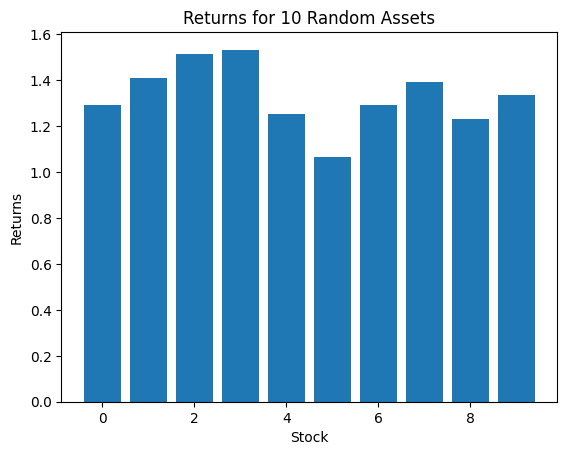

In [20]:

plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));